In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#### Load data

In [58]:
df = pd.read_csv('House_data.csv')

In [59]:
df.shape

(20640, 11)

In [60]:
df.head(10)

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  int64  
 4   total_rooms         20640 non-null  int64  
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  int64  
 7   households          20640 non-null  int64  
 8   median_income       20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.7+ MB


In [62]:
df.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,15479.250000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [63]:
df.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [64]:
df.isna().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [65]:
df1=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


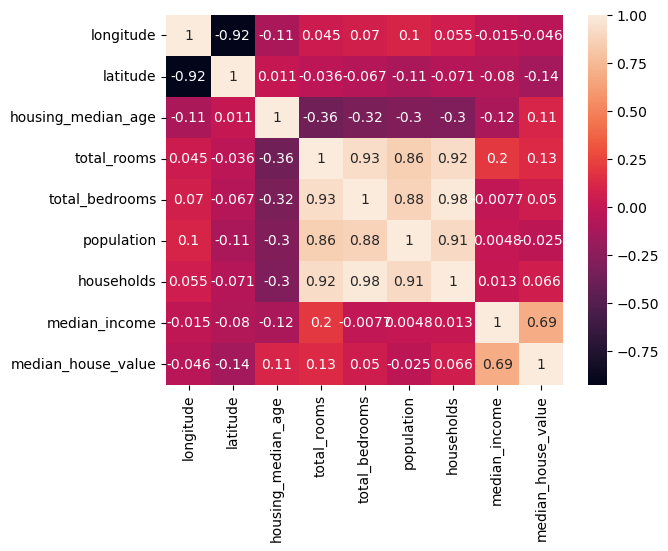

In [67]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

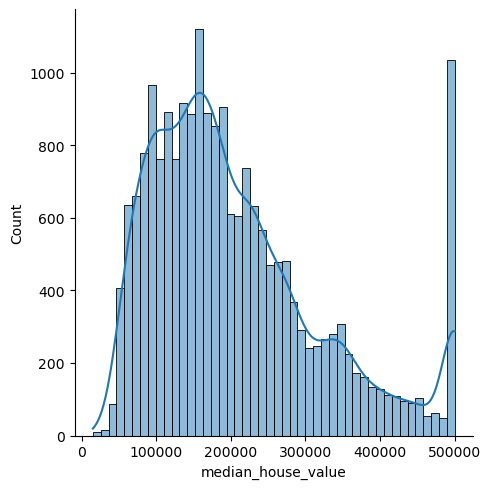

In [68]:
sns.displot(df1['median_house_value'],kde=True)
plt.show()

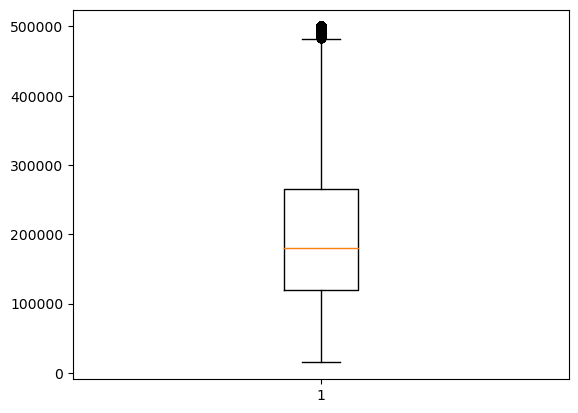

In [69]:
plt.boxplot(df1['median_house_value'])
plt.show()

In [70]:
iqr = df1['median_house_value'].quantile(0.75)-df1['median_house_value'].quantile(0.25)
print(iqr)
outlier=1.5*iqr
print(outlier)
upper_outlier= df1['median_house_value'].quantile(0.75)+outlier
print(upper_outlier)
df_out=df1[df1['median_house_value']>upper_outlier]
print('Total outliers: ',len(df_out))
df_out['median_house_value'].value_counts()

145125.0
217687.5
482412.5
Total outliers:  1071


median_house_value
500001    965
500000     27
483300      6
485000      3
495500      3
         ... 
498600      1
490300      1
492200      1
488500      1
492000      1
Name: count, Length: 64, dtype: int64

In [71]:
df2=pd.DataFrame()
df2['median_house_value']=[x if x<482700 else df1['median_house_value'].quantile(0.90) for x in df1['median_house_value']]

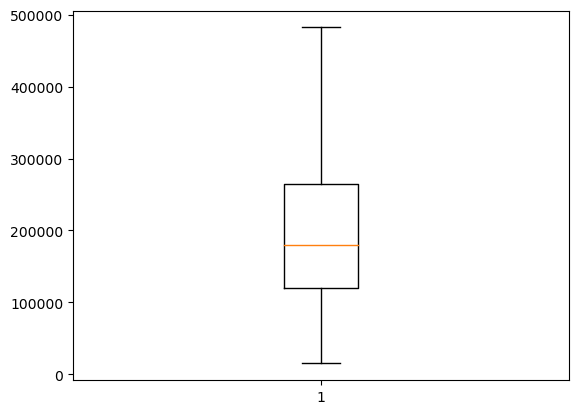

In [72]:
plt.boxplot(df2['median_house_value'])
#df.plot(kind='box')
plt.show()

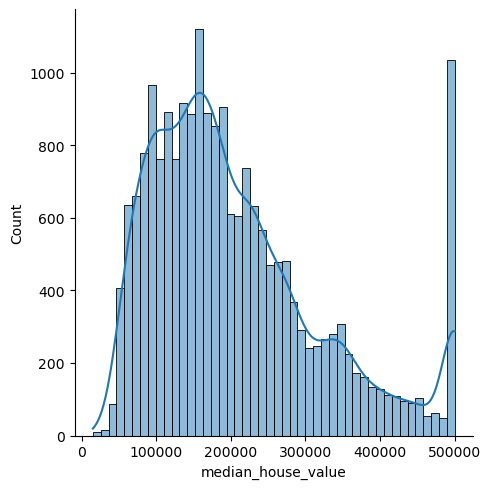

In [73]:
sns.displot(df1['median_house_value'],kde=True)
plt.show()

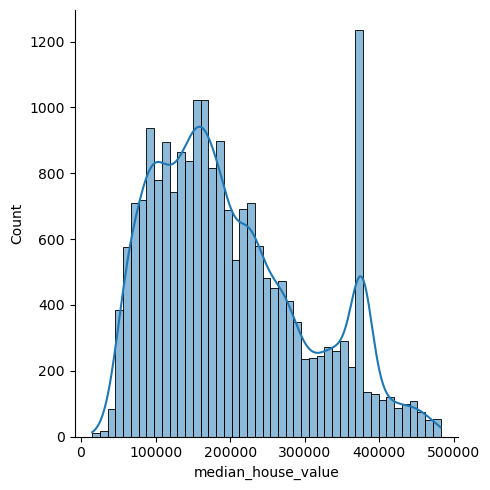

In [74]:

sns.displot(df2['median_house_value'],kde=True)
plt.show()

In [75]:
df2['median_house_value_sqrt_trans']=np.sqrt(df2['median_house_value'])
df2['median_house_value_cbrt_trans']=np.cbrt(df2['median_house_value'])
df2.head()

,median_house_value,median_house_value_sqrt_trans,median_house_value_cbrt_trans
0,452600.0,672.755528,76.778245
1,358500.0,598.748695,71.038926
2,352100.0,593.380148,70.613652
3,341300.0,584.208867,69.884162
4,342200.0,584.978632,69.945536


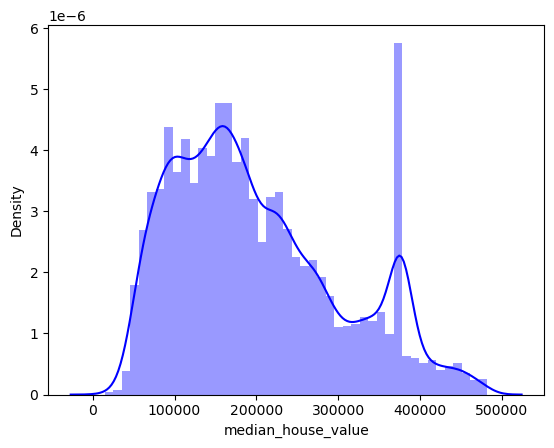

In [76]:
sns.distplot(df2['median_house_value'], hist=True, color='Blue')
plt.show()

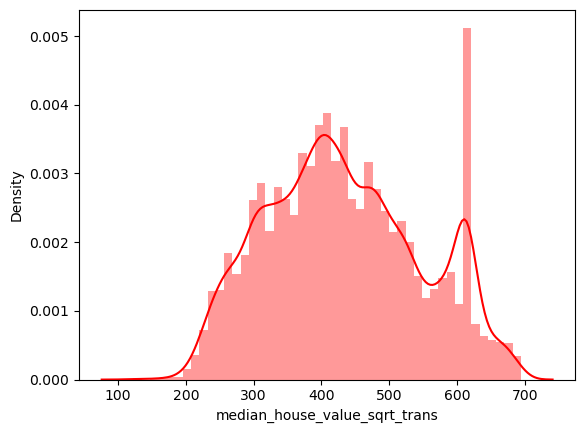

In [77]:
sns.distplot(df2['median_house_value_sqrt_trans'], hist=True, color='Red')
plt.show()

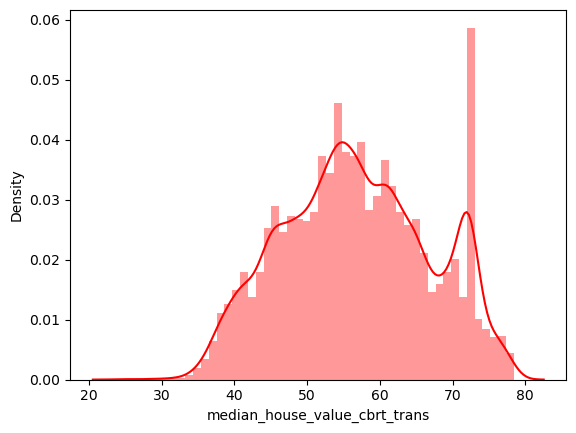

In [78]:
sns.distplot(df2['median_house_value_cbrt_trans'], hist=True, color='Red')
plt.show()

In [79]:
df1['median_house_value']=[x if x<482700 else df1['median_house_value'].quantile(0.90) for x in df1['median_house_value']]

In [80]:
df1['ocean_proximity']=df['ocean_proximity']

In [81]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Fit and transform the data
onehot_encoded = encoder.fit_transform(df1[['ocean_proximity']])

# Convert the one-hot encoded array into a DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

In [82]:
onehot_encoded_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [83]:
Final_df=pd.concat([df1,onehot_encoded_df],axis=1)

In [84]:
Final_df.drop('ocean_proximity',axis=1,inplace=True)

In [85]:
Final_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [86]:
#Final_df['total_bedrooms'].fillna('median',inplace=True)

In [87]:
#Final_df['total_bedrooms']= pd.to_numeric(Final_df['total_bedrooms'],errors='coerce' ) 

In [88]:
Final_df.drop('total_bedrooms',inplace=True,axis=1)

In [89]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   population                  20640 non-null  int64  
 5   households                  20640 non-null  int64  
 6   median_income               20640 non-null  float64
 7   median_house_value          20640 non-null  float64
 8   ocean_proximity_<1H OCEAN   20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  float64
 10  ocean_proximity_ISLAND      20640 non-null  float64
 11  ocean_proximity_NEAR BAY    20640 non-null  float64
 12  ocean_proximity_NEAR OCEAN  20640 non-null  float64
dtypes: float64(9), int64(4)
memory 

In [90]:
x=Final_df.drop('median_house_value',axis=1)
y=Final_df['median_house_value']

In [91]:
print(x.shape)
print(y.shape)

(20640, 12)
(20640,)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (14448, 12)
y_train: (14448,)
X_test: (6192, 12)
y_test: (6192,)


In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [94]:
lr=LinearRegression()

In [95]:
model=lr.fit(X_train,y_train)

In [96]:
model.intercept_

-2117017.419447536

In [97]:
model.score(X_train,y_train)

0.625205729111538

In [98]:
y_pred=model.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n=len(y)
p = x.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 3869088689.227856
R-squared: 0.6249206205326554
Adjusted R-squared: 0.6247024136895076


In [100]:
model.predict(np.array([-120,34,25,700,1000,430,7000,452340.00,1,0,0,0]).reshape(1,-1))

array([-8.40094361e+09])

In [101]:
print(X_train.shape)
print(y_train.shape)

(14448, 12)
(14448,)


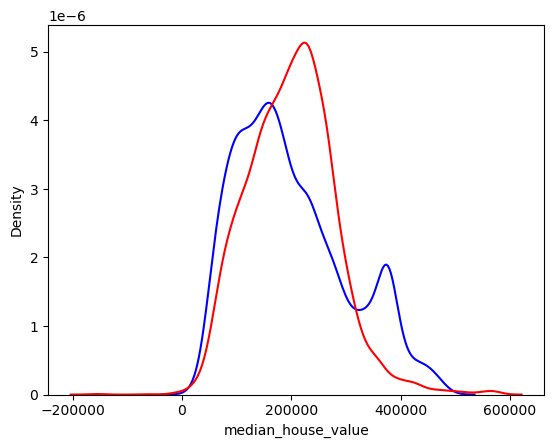

In [102]:
sns.distplot(y_test, hist=False, color='Blue')
sns.distplot(y_pred, hist=False, color='Red')
plt.show()

In [103]:
y_pred.min()

-161578.92904459732

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [105]:
rf=RandomForestRegressor()

In [106]:
model1=rf.fit(X_train,y_train)

In [107]:
model1.score(X_train,y_train)

0.9742033036683642

In [108]:
y_pred_rf=model1.predict(X_test)

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

n=len(y)
p = x.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 1880563124.8439639
R-squared: 0.8176933881408619
Adjusted R-squared: 0.8175873291239273


In [110]:
#model1.predict(np.array([-120,34,25,700,1000,430,7000,452340.00,1,0,0,0]).reshape(1,-1))

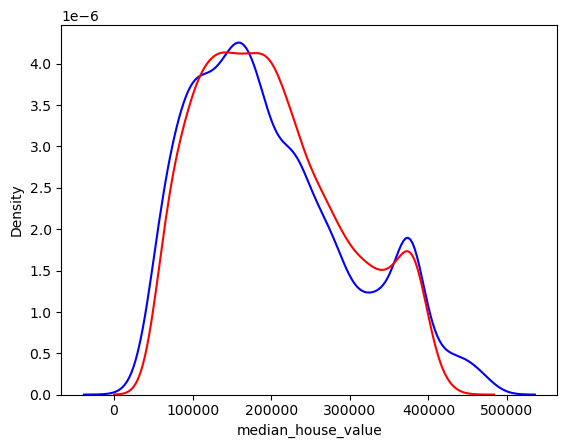

In [111]:
sns.distplot(y_test, hist=False, color='Blue')
sns.distplot(y_pred_rf, hist=False, color='Red')
plt.show()

### Feature importance

In [114]:
feature_scores = pd.Series(model1.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

median_income                 0.470833
ocean_proximity_INLAND        0.156206
longitude                     0.115876
latitude                      0.106565
housing_median_age            0.045034
population                    0.034668
total_rooms                   0.031485
households                    0.028455
ocean_proximity_NEAR OCEAN    0.006401
ocean_proximity_<1H OCEAN     0.003311
ocean_proximity_NEAR BAY      0.000616
ocean_proximity_ISLAND        0.000550
dtype: float64